##Cyber Security##

####Project 3#### 

DESCRIPTION

Problem Statement:

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

 

###Dataset Details:###

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.

 
####Exploratory Data Analysis:####

Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

Determine the number of samples present in the data, unique elements in all the features. 

Check if there is any null value in any features. 

Correlation of features and feature selection:

Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.


####Building Classification Model####

Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.

Build classification models using a binary classifier to detect malicious or phishing URLs.

Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

Validate the accuracy of data by the K-Fold cross-validation technique.

The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv('/content/drive/MyDrive/AI/capstone_project/cyber_security/dataset.csv',index_col='index')

In [60]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
2,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
3,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
4,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
5,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [61]:
df.shape

(11055, 31)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11055 entries, 1 to 11055
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

**Comments:**
There are no categorical variables in the dataset

Exploratory Data Analysis:

Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

Determine the number of samples present in the data, unique elements in all the features. 

Check if there is any null value in any features. 

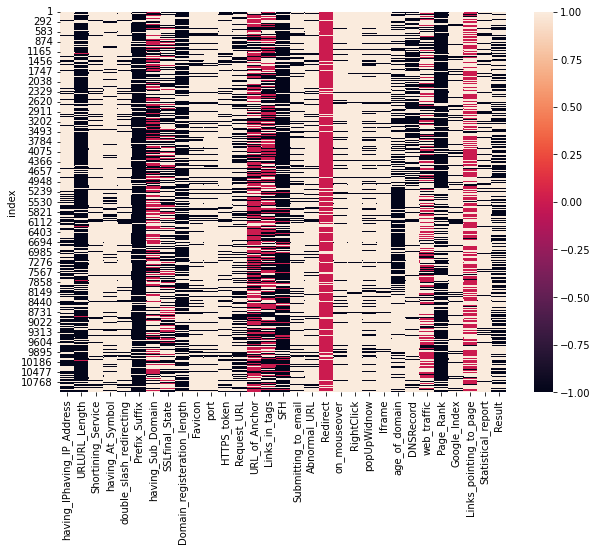

In [63]:
fig=plt.figure(figsize=(10,7))
sns.heatmap(df)

In [64]:
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [65]:
df.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

**Task 1:** Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps.

In [66]:
for i in df.columns:
  print(df[i].value_counts(normalize=True)*100, '\n\n')

 1    65.689733
-1    34.310267
Name: having_IPhaving_IP_Address, dtype: float64 


-1    81.049299
 1    17.729534
 0     1.221167
Name: URLURL_Length, dtype: float64 


 1    86.938037
-1    13.061963
Name: Shortining_Service, dtype: float64 


 1    85.029398
-1    14.970602
Name: having_At_Symbol, dtype: float64 


 1    87.073722
-1    12.926278
Name: double_slash_redirecting, dtype: float64 


-1    86.748078
 1    13.251922
Name: Prefix_Suffix, dtype: float64 


 1    36.815920
 0    32.763455
-1    30.420624
Name: having_Sub_Domain, dtype: float64 


 1    57.268204
-1    32.175486
 0    10.556309
Name: SSLfinal_State, dtype: float64 


-1    66.838535
 1    33.161465
Name: Domain_registeration_length, dtype: float64 


 1    81.429218
-1    18.570782
Name: Favicon, dtype: float64 


 1    86.413388
-1    13.586612
Name: port, dtype: float64 


 1    83.753957
-1    16.246043
Name: HTTPS_token, dtype: float64 


 1    59.339665
-1    40.660335
Name: Request_URL, dtype: float64 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c15477c50>,
      dtype=object)

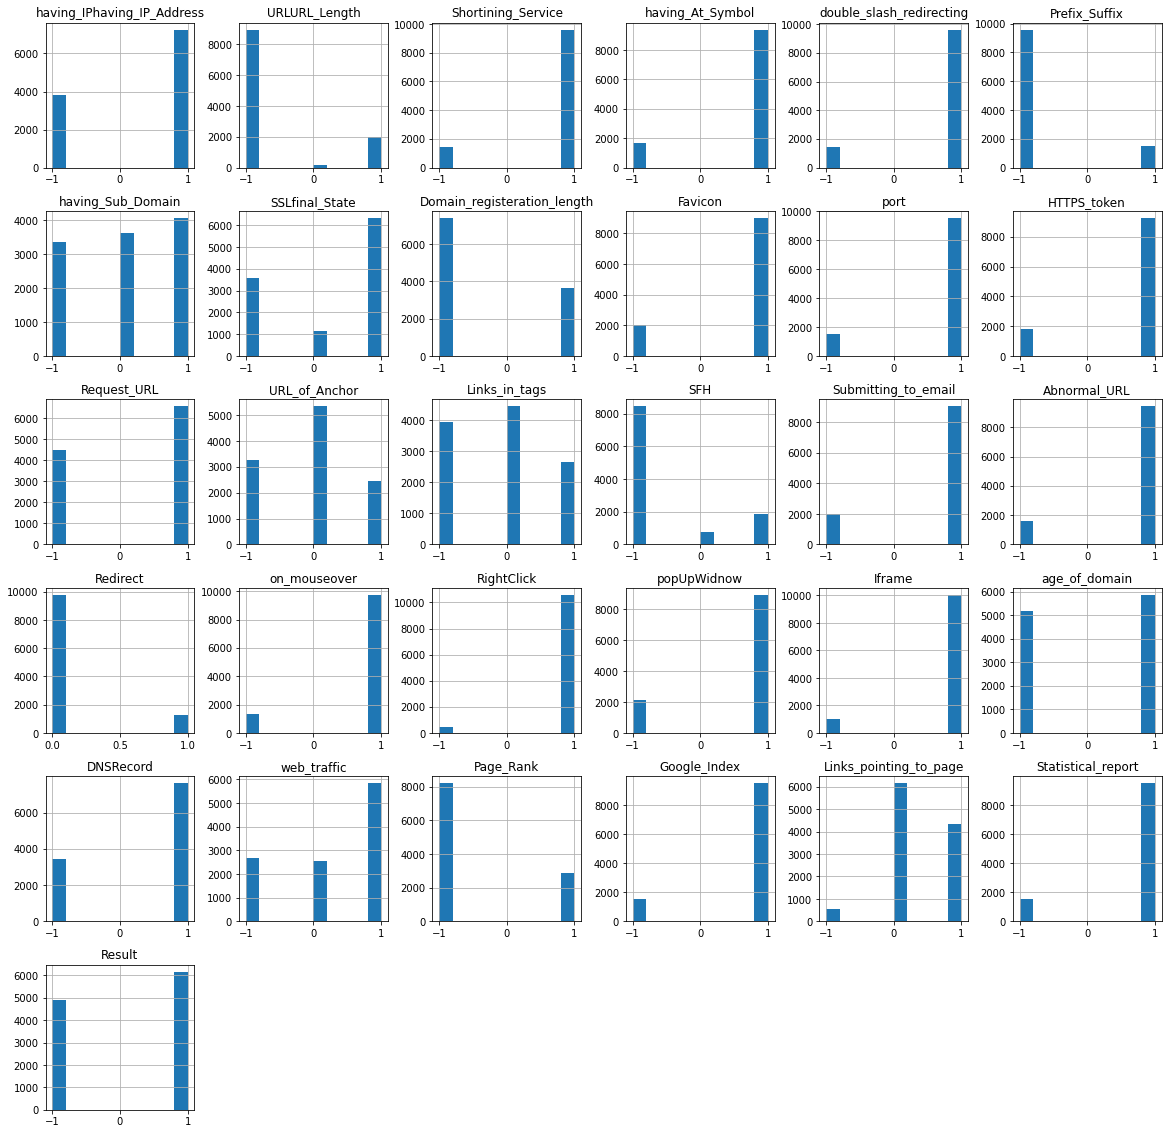

In [67]:
df.hist(figsize=(20,20))

Comments: Most of the data sets have imabalanced features

**Task 2:**Determine the number of samples present in the data, unique elements in all the features. 

In [68]:
df.nunique()

having_IPhaving_IP_Address     2
URLURL_Length                  3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

**Task 3:** Check if there is any null values in any features. 

In [69]:
df.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

**Task 4:**  find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

In [70]:
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


In [71]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [72]:
corr_features = correlation(df, 0.8)
corr_features

{'double_slash_redirecting', 'popUpWidnow', 'port'}

In [73]:
df_new=df.drop(corr_features,axis=1)

In [74]:
df_new.shape

(11055, 28)

In [75]:
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

####**Building Classification Model**####

Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.

Build classification models using a binary classifier to detect malicious or phishing URLs.

Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

Validate the accuracy of data by the K-Fold cross-validation technique.

The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

**Task 5:** Build classification models using a binary classifier to detect malicious or phishing URLs.

In [76]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.model_selection import train_test_split      

In [77]:
X_train,X_test,y_train,y_test=train_test_split(df_new.drop('Result',axis=1), df_new['Result'], test_size=0.2)

In [78]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,lg.fit(X_train,y_train).predict(X_test)))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       964
           1       0.93      0.94      0.94      1247

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [83]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


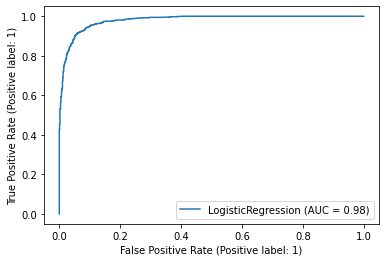

In [84]:
plot_roc_curve(lg,X_test,y_test)

**Task 6:**Validate the accuracy of data by the K-Fold cross-validation technique.

In [79]:
lg.fit(X_train,y_train).predict_proba(X_test)

array([[9.81131385e-01, 1.88686154e-02],
       [2.45211647e-01, 7.54788353e-01],
       [9.99747266e-01, 2.52734217e-04],
       ...,
       [9.56820839e-01, 4.31791607e-02],
       [9.88914019e-01, 1.10859814e-02],
       [1.19542106e-01, 8.80457894e-01]])

In [87]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lg,df_new.drop('Result', axis=1),df_new['Result'],cv=5)

In [88]:
scores

array([0.92265943, 0.92672999, 0.9262777 , 0.91677974, 0.923564  ])